In [1]:
!pip install matplotlib torch torchvision skorch
!pip install cleanlab

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from torch import nn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from skorch import NeuralNetClassifier

In [3]:
mnist = fetch_openml("mnist_784")  # Fetch the MNIST dataset

X = mnist.data.astype("float32").to_numpy() # 2D array (images are flattened into 1D)
X /= 255.0  # Scale the features to the [0, 1] range
X = X.reshape(len(X), 1, 28, 28)  # reshape into [N, C, H, W] for PyTorch

labels = mnist.target.astype("int64").to_numpy()  # 1D array of given labels

In [5]:
class ClassifierModule(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.out = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax(dim=-1),
        )

    def forward(self, X):
        X = self.cnn(X)
        X = self.out(X)
        return X

In [6]:
model_skorch = NeuralNetClassifier(ClassifierModule)

In [64]:
num_crossval_folds = 5  # for efficiency; values like 5 or 10 will generally work better
pred_probs = cross_val_predict(
    model_skorch,
    X,
    labels,
    cv=num_crossval_folds,
    method="predict_proba",
)

C:\Users\21741\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6360       0.9303        0.2534  3.6959
      2        0.1843       0.9519        0.1695  3.5034
      3        0.1363       0.9614        0.1352  3.6173
      4        0.1122       0.9669        0.1148  3.5866
      5        0.0967       0.9699        0.1015  3.5564
      6        0.0857       0.9721        0.0919  3.4543
      7        0.0774       0.9741        0.0847  3.4070
      8        0.0709       0.9747        0.0793  3.4113
      9        0.0656       0.9762        0.0749  3.4264
     10        0.0611       0.9767        0.0716  3.4620


C:\Users\21741\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6177       0.9431        0.2149  3.3375
      2        0.1645       0.9605        0.1433  3.3730
      3        0.1183       0.9681        0.1164  3.3958
      4        0.0963       0.9707        0.1017  3.3597
      5        0.0827       0.9733        0.0923  3.3050
      6        0.0732       0.9751        0.0859  3.3422
      7        0.0662       0.9760        0.0813  3.2616
      8        0.0608       0.9772        0.0780  3.3434
      9        0.0563       0.9779        0.0749  3.3297
     10        0.0526       0.9787        0.0726  3.3529


C:\Users\21741\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6244       0.9383        0.2342  3.4210
      2        0.1770       0.9566        0.1569  3.3216
      3        0.1305       0.9629        0.1287  3.3424
      4        0.1081       0.9656        0.1126  3.3008
      5        0.0939       0.9680        0.1018  3.3698
      6        0.0836       0.9710        0.0942  3.3827
      7        0.0756       0.9741        0.0882  3.3885
      8        0.0693       0.9757        0.0833  3.3498
      9        0.0640       0.9762        0.0793  3.3412
     10        0.0596       0.9767        0.0762  3.3125


C:\Users\21741\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6711       0.9304        0.2570  3.4563
      2        0.1932       0.9508        0.1687  3.4353
      3        0.1384       0.9597        0.1358  3.3217
      4        0.1121       0.9653        0.1165  3.4012
      5        0.0957       0.9687        0.1046  3.3082
      6        0.0844       0.9708        0.0955  3.3453
      7        0.0760       0.9736        0.0892  3.3084
      8        0.0693       0.9740        0.0846  3.3638
      9        0.0641       0.9751        0.0809  3.2832
     10        0.0597       0.9765        0.0778  3.3435


C:\Users\21741\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7469       0.9293        0.2760  3.3262
      2        0.2266       0.9516        0.1790  3.3244
      3        0.1584       0.9596        0.1416  3.3599
      4        0.1260       0.9655        0.1197  3.3379
      5        0.1058       0.9698        0.1050  3.3546
      6        0.0919       0.9718        0.0958  3.3421
      7        0.0816       0.9739        0.0887  3.3370
      8        0.0737       0.9753        0.0835  3.3632
      9        0.0674       0.9767        0.0793  3.3569
     10        0.0623       0.9771        0.0756  3.3335


In [65]:
predicted_labels = pred_probs.argmax(axis=1)
acc = accuracy_score(labels, predicted_labels)
print(f"Cross-validated estimate of accuracy on held-out data: {acc}")

Cross-validated estimate of accuracy on held-out data: 0.9787714285714286


In [66]:
from cleanlab.filter import find_label_issues

ranked_label_issues = find_label_issues(
    labels,
    pred_probs,
    return_indices_ranked_by="self_confidence",
)

print(f"Cleanlab found {len(ranked_label_issues)} label issues.")
print(f"Top 15 most likely label errors: \n {ranked_label_issues[:15]}")

Cleanlab found 105 label issues.
Top 15 most likely label errors: 
 [59915 32776  8729 16376 24798 49543 53216 26748 43658  8200 63520  7010
  2720 69770  2676]


In [73]:
# Note: This pulldown content is for docs.cleanlab.ai, if running on local Jupyter or Colab, please ignore it.

import matplotlib.pyplot as plt

def plot_examples(id_iter, nrows=1, ncols=1):
    for count, id in enumerate(id_iter):
        plt.subplot(nrows, ncols, count + 1)
        plt.imshow(X[id].reshape(28, 28), cmap="gray")
        plt.title(f"id: {id} \n label: {predicted_labels[id]}")
        plt.axis("off")

    plt.tight_layout(h_pad=2.0)

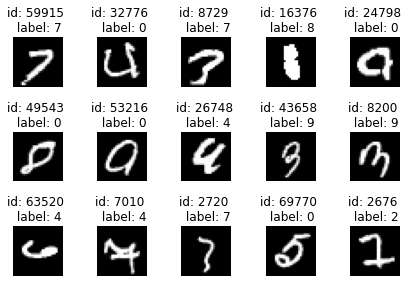

In [74]:
plot_examples(ranked_label_issues[range(15)], 3, 5)

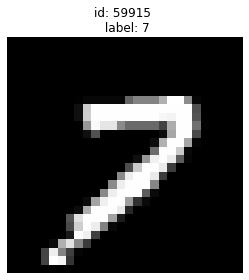

In [75]:
plot_examples([59915])

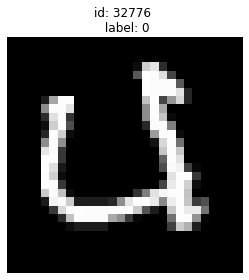

In [77]:
plot_examples([32776])